## 1  Preliminaries

In [39]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

In [ ]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


## 2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [7]:
names2000['name']

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [15]:
names2000[:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [10]:
names2000['name'][:25]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

## 2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [17]:
names2000[['births', 'sex']]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned the cell above. 

In [18]:
names2000[['births', 'sex']][:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


## Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

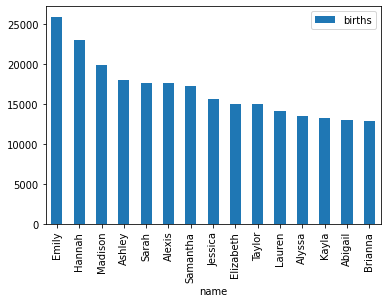

In [53]:
dframe = pd.DataFrame(names2000)
dframe[:15].plot.bar(x='name')

## Aggregation

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

In [76]:
import pandas as pd
import numpy as np
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path,error_bad_lines=False)
complaints['Count'] = 1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the `Count` column:

In [58]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [59]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.


In [99]:
pt00.pivot_table(pt00, 'Agency', ['Complaint Type'], aggfunc='count')
#I think this is the best I can do. I was trying to make it look neater. But, this is probably the best outcome for me.

Address Type                                   \
Complaint Type Agency Issues Animal Abuse Bike Rack Condition   
Agency                                                          
DOP                      NaN          NaN                 NaN   
DOT                      0.0          NaN                 7.0   
NYPD                     NaN        164.0                 NaN   

                                                                            \
Complaint Type Bike/Roller/Skate Chronic Blocked Driveway Bridge Condition   
Agency                                                                       
DOP                                  NaN              NaN              NaN   
DOT                                  NaN              NaN              0.0   
NYPD                                32.0           4590.0              NaN   

                                                                        \
Complaint Type Broken Muni Meter Bus Stop Shelter Placement Compliment   
Agency                                                                   
DOP                          NaN                        NaN        NaN   
DOT                       2004.0                       14.0        0.0   
NYPD                         NaN                        NaN        NaN   

                                                                       \
Complaint Type Curb Condition DOT Literature Request Derelict Vehicle   
Agency                                                                  
DOP                       NaN                    NaN              NaN   
DOT                      65.0                    0.0              NaN   
NYPD                      NaN                    NaN            802.0   

                                                                        \
Complaint Type Disorderly Youth Drinking Ferry Complaint Ferry Inquiry   
Agency                                                                   
DOP                         NaN      NaN             NaN           NaN   
DOT                         NaN      NaN             0.0           0.0   
NYPD                       26.0     83.0             NaN           NaN   

                                                                               \
Complaint Type Ferry Permit Graffiti Highway Condition Highway Sign - Damaged   
Agency                                                                          
DOP                     NaN      NaN               NaN                    NaN   
DOT                     0.0      NaN               0.0                    0.0   
NYPD                    NaN     13.0               NaN                    NaN   

                                                                      \
Complaint Type Homeless Encampment Illegal Fireworks Illegal Parking   
Agency                                                                 
DOP                            NaN               NaN             NaN   
DOT                            NaN               NaN             NaN   
NYPD                         267.0               3.0          3343.0   

                                                                         \
Complaint Type Invitation Municipal Parking Facility Noise - Commercial   
Agency                                                                    
DOP                   0.0                        NaN                NaN   
DOT                   NaN                        0.0                NaN   
NYPD                  NaN                        NaN             2578.0   

                                                                              \
Complaint Type Noise - House of Worship Noise - Park Noise - Street/Sidewalk   
Agency                                                                         
DOP                                 NaN          NaN                     NaN   
DOT                                 NaN          NaN                     NaN   
NYPD                               67.0        191.0    

In [107]:
pt00.pivot_table(pt00, index=['Agency','Complaint Type'], aggfunc='count')

Address Type  Agency Name  Borough  \
Agency Complaint Type                                                   
DOP    Invitation                             0            1        1   
       Request for Information                0            1        1   
DOT    Agency Issues                          0           20       20   
       Bike Rack Condition                    7            7        7   
       Bridge Condition                       0           20       20   
       Broken Muni Meter                   2004         2070     2070   
       Bus Stop Shelter Placement            14           14       14   
       Compliment                             0            1        1   
       Curb Condition                        65           66       66   
       DOT Literature Request                 0          123      123   
       Ferry Complaint                        0            4        4   
       Ferry Inquiry                          0           32       32   
       Ferry Permit                           0            1        1   
       Highway Condition                      0          130      130   
       Highway Sign - Damaged                 0            1        1   
       Municipal Parking Facility             0            1        1   
       Parking Card                           0            8        8   
       Public Toilet                          6            6        6   
       Sidewalk Condition                   335          339      339   
       Street Condition                    3358         3473     3473   
       Street Light Condition              6398         7117     7117   
       Street Sign - Damaged                686          691      691   
       Street Sign - Dangling               109          110      110   
       Street Sign - Missing                323          327      327   
       Traffic Signal Condition            3145         3145     3145   
       Tunnel Condition                       0            1        1   
NYPD   Animal Abuse                         164          164      164   
       Bike/Roller/Skate Chronic             32           32       32   
       Blocked Driveway                    4590         4590     4590   
       Derelict Vehicle                     802          803      803   
       Disorderly Youth                      26           26       26   
       Drinking                              83           83       83   
       Graffiti                              13           13       13   
       Homeless Encampment                  267          269      269   
       Illegal Fireworks                      3            3        3   
       Illegal Parking                     3343         3343     3343   
       Noise - Commercial                  2578         2578     2578   
       Noise - House of Worship              67           67       67   
       Noise - Park                         191          191      191   
       Noise - Street/Sidewalk             1927         1928     1928   
       Noise - Vehicle                      749          750      750   
       Panhandling                           23           23       23   
       Posting Advertisement                  5            5        5   
       Traffic                              160          168      168   
       Urinating in Public                   30           30       30   
       Vending                              229          229      229   

                                   Bridge Highway Direction  \
Agency Complaint Type                                         
DOP    Invitation                                         0   
       Request for Information                            0   
DOT    Agency Issues                                      0   
       Bike Rack Condition                                0   
       Bridge Condition                                  20   
       Broken Muni Meter                                  0   
       Bus Stop Shelter Pl

In [103]:
pt00.pivot_table(pt00, index=['Complaint Type', 'Agency'], aggfunc='count')

,,Address Type,Agency Name,Borough,Bridge Highway Direction,Bridge Highway Name,Bridge Highway Segment,City,Closed Date,Community Board,Count,Created Date,Cross Street 1,Cross Street 2,Descriptor,Due Date,Facility Type,Ferry Direction,Ferry Terminal Name,Garage Lot Name,Incident Address,Incident Zip,Intersection Street 1,Intersection Street 2,Landmark,Latitude,Location,Location Type,Longitude,Park Borough,Park Facility Name,Resolution Action Updated Date,Road Ramp,School Address,School City,School Code,School Name,School Not Found,School Number,School Phone Number,School Region,School State,School Zip,School or Citywide Complaint,Status,Street Name,Taxi Company Borough,Taxi Pick Up Location,Unique Key,Vehicle Type,X Coordinate (State Plane),Y Coordinate (State Plane)
Complaint Type,Agency,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,DOT,0,20,20,0,0,0,0,0,20,20,20,0,0,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,0,0,20,20,20,20,20,20,20,20,20,20,0,20,0,0,0,20,0,0,0
Animal Abuse,NYPD,164,164,164,0,0,0,164,164,164,164,164,142,142,164,164,164,0,0,0,142,164,22,22,0,163,163,164,163,164,164,164,0,164,164,164,164,164,164,164,164,164,164,0,164,142,0,0,164,0,163,163
Bike Rack Condition,DOT,7,7,7,0,0,0,7,2,7,7,7,6,6,7,7,0,0,0,0,6,7,1,1,0,7,7,7,7,7,7,6,0,7,7,7,7,7,7,7,7,7,7,0,7,6,0,0,7,0,7,7
Bike/Roller/Skate Chronic,NYPD,32,32,32,0,0,0,32,32,32,32,32,14,14,0,32,32,0,0,0,13,32,18,18,1,32,32,32,32,32,32,32,0,32,32,32,32,32,32,32,32,32,32,0,32,13,0,0,32,0,32,32
Blocked Driveway,NYPD,4590,4590,4590,0,0,0,4590,4581,4590,4590,4590,4423,4423,4590,4590,4590,0,0,0,4496,4590,94,94,0,4589,4589,4590,4589,4590,4590,4588,0,4590,4590,4590,4590,4590,4590,4590,4590,4590,4590,0,4590,4496,0,0,4590,0,4589,4589
Bridge Condition,DOT,0,20,20,20,20,20,11,19,20,20,20,0,0,20,20,0,0,0,0,0,4,0,0,0,11,11,20,11,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,0,0,0,20,0,11,11
Broken Muni Meter,DOT,2004,2070,2070,0,0,0,2050,1719,2070,2070,2070,1105,1106,2070,2070,0,0,0,48,1060,2050,938,940,0,2039,2039,2070,2039,2070,2070,1713,0,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,0,2070,1060,0,0,2070,0,2039,2039
Bus Stop Shelter Placement,DOT,14,14,14,0,0,0,14,12,14,14,14,4,4,14,14,0,0,0,0,4,14,10,10,0,14,14,14,14,14,14,14,0,14,14,14,14,14,14,14,14,14,14,0,14,4,0,0,14,0,14,14
Compliment,DOT,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0
